<a href="https://colab.research.google.com/github/Vyshnavi2023/Deep_Learning/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🛠 Total detections before NMS: 9
✅ Objects detected after NMS: 3
Indices after NMS: [1 2 3]


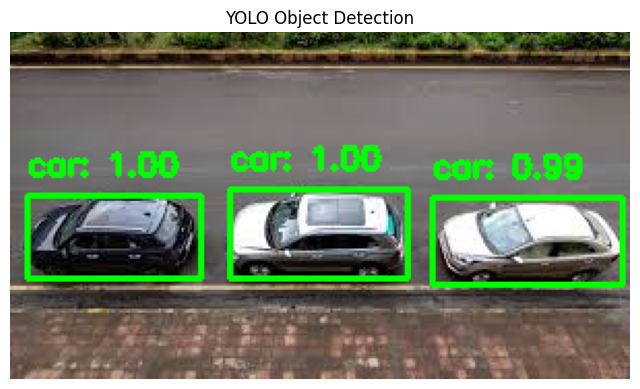

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the YOLO model
yolo = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load image
image = cv2.imread("/content/images.jpeg")  # Replace with actual image path
height, width = image.shape[:2]  # Ensure width and height are defined

# Convert image to blob
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
yolo.setInput(blob)

# Get output layer names
layer_names = yolo.getLayerNames()
output_layer_names = [layer_names[i - 1] for i in yolo.getUnconnectedOutLayers()]

# Perform forward pass
outputs = yolo.forward(output_layer_names)

# Confidence threshold (adjust as needed)
conf_threshold = 0.05  # Reduced to increase detections
nms_threshold = 0.4

# Initialize lists
boxes = []
confidences = []
class_ids = []

# Process YOLO outputs
for output in outputs:
    for detection in output:
        scores = detection[5:]  # Class probabilities
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > conf_threshold:
            center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype("int")
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Check detections before NMS
print(f"🛠 Total detections before NMS: {len(boxes)}")

# Apply Non-Maximum Suppression (NMS)
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

if len(indices) > 0:
    indices = indices.flatten()
    print(f"✅ Objects detected after NMS: {len(indices)}")
else:
    print("⚠️ No objects detected after NMS. Try lowering the confidence threshold.")

print("Indices after NMS:", indices)

# Draw bounding boxes
image_copy = image.copy()
for i in indices:
    x, y, w, h = boxes[i]
    color = (0, 255, 0)  # Green
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image_copy, f"{classes[class_ids[i]]}: {confidences[i]:.2f}",
                (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show results
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLO Object Detection")
plt.show()
